# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 292 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 68.1 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 57.8 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 32.1 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 39.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 29.6 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 19.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 13.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 7.8 MB/s  eta 0:00:01
     |████████████████████████████████| 121 kB 14.9 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.8 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=3a36d3aded942ed8348185a0dfc517df374ef7806eccde1a4a6dde4e05821950
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [13]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.RandomHorizontalFlip(p=0.3), transforms.Normalize((0.1307,), (0.3081,))])
transform_test = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Create training set and define training dataloader
training_data =torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True,transform=transform_test )

# Create test set and define test dataloader
train_loader =torch.utils.data.DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**I have applied random rotation to randomly rotate data for data augmentation and I also normalized the dataset , The normalization value I found on stackoverflow that is best suitable for this dataset**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


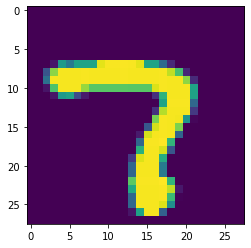

7


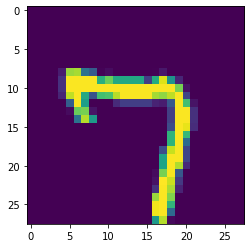

0


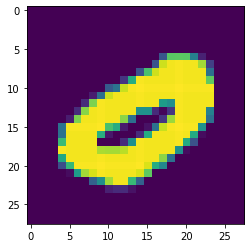

4


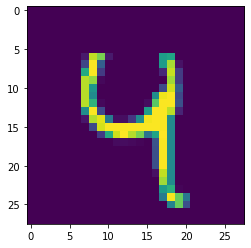

9


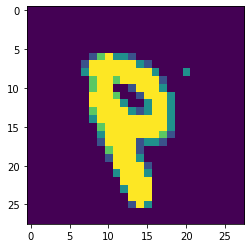

In [5]:
# Explore data
show5(train_loader)

In [6]:
len(train_loader)

1875

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x
model=Net()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
## YOUR CODE HERE ##
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cuda


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
## YOUR CODE HERE ##


# Set the number of batches after which you want to print the loss
print_loss_interval = 500
num_epochs=9
train_loss_history = list()
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    
    # Iterate over the training dataset in batches
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels from the data batch
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate the loss
        running_loss += loss.item()
        
        # Print the loss after a set number of batches
        if (i+1) % print_loss_interval == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {running_loss/print_loss_interval}')
            running_loss = 0.0
    train_loss_history.append(running_loss/len(train_loader))
    

print('Training complete.')


Epoch [1/9], Batch [500/1875], Loss: 0.6677324929833413
Epoch [1/9], Batch [1000/1875], Loss: 0.3770110762119293
Epoch [1/9], Batch [1500/1875], Loss: 0.3178196812868118
Epoch [2/9], Batch [500/1875], Loss: 0.23802553743869065
Epoch [2/9], Batch [1000/1875], Loss: 0.22412602953612804
Epoch [2/9], Batch [1500/1875], Loss: 0.2151745605431497
Epoch [3/9], Batch [500/1875], Loss: 0.1800198585446924
Epoch [3/9], Batch [1000/1875], Loss: 0.168643642982468
Epoch [3/9], Batch [1500/1875], Loss: 0.1622827008869499
Epoch [4/9], Batch [500/1875], Loss: 0.15007798523828386
Epoch [4/9], Batch [1000/1875], Loss: 0.15146771804243325
Epoch [4/9], Batch [1500/1875], Loss: 0.14945563664101064
Epoch [5/9], Batch [500/1875], Loss: 0.13007073744852096
Epoch [5/9], Batch [1000/1875], Loss: 0.13239365222491323
Epoch [5/9], Batch [1500/1875], Loss: 0.13647926255315543
Epoch [6/9], Batch [500/1875], Loss: 0.12249887097021565
Epoch [6/9], Batch [1000/1875], Loss: 0.12060250707995146
Epoch [6/9], Batch [1500/187

Plot the training loss (and validation loss/accuracy, if recorded).

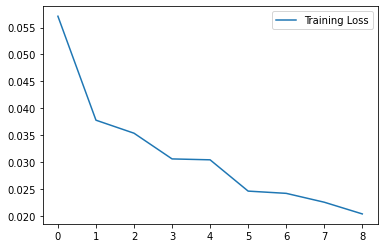

In [11]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [14]:
## YOUR CODE HERE ##
model.eval()

correct = 0
total = 0

# Disable gradient calculation for inference
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass: compute predicted outputs by passing inputs to the model
        images,labels=images.to(device),labels.to(device)
        outputs = model(images)
        
        # Get the predicted class with the highest probability
        _, predicted = torch.max(outputs.data, 1)
        
        # Update the total number of labels
        total += labels.size(0)
        
        # Update the number of correct predictions
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')


Accuracy of the model on the test images: 96.16%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [21]:
## YOUR CODE HERE ##

class Net_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 64)
        self.fc3 = nn.Linear(64, 35)
        self.fc4 = nn.Linear(35, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x
model_1=Net_1()
model_1.to(device)
## YOUR CODE HERE ##



Net_1(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=35, bias=True)
  (fc4): Linear(in_features=35, out_features=10, bias=True)
)

In [22]:
## YOUR CODE HERE ##
optimizer_1= optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Choose a loss function
criterion_1 = nn.CrossEntropyLoss()


In [23]:
## YOUR CODE HERE ##


# Set the number of batches after which you want to print the loss
print_loss_interval = 500
num_epochs=9
train_loss_history = list()
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    
    # Iterate over the training dataset in batches
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels from the data batch
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the gradients
        optimizer_1.zero_grad()
        
        # Forward pass
        outputs = model_1(inputs)
        loss = criterion_1(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate the loss
        running_loss += loss.item()
        
        # Print the loss after a set number of batches
        if (i+1) % print_loss_interval == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {running_loss/print_loss_interval}')
            running_loss = 0.0
    train_loss_history.append(running_loss/len(train_loader))
    

print('Training complete.')


Epoch [1/9], Batch [500/1875], Loss: 2.3065268635749816
Epoch [1/9], Batch [1000/1875], Loss: 2.3065053005218505
Epoch [1/9], Batch [1500/1875], Loss: 2.3065354428291323
Epoch [2/9], Batch [500/1875], Loss: 2.3077939462661745
Epoch [2/9], Batch [1000/1875], Loss: 2.3056643319129946
Epoch [2/9], Batch [1500/1875], Loss: 2.306474087238312
Epoch [3/9], Batch [500/1875], Loss: 2.3076848149299622
Epoch [3/9], Batch [1000/1875], Loss: 2.3055693058967592
Epoch [3/9], Batch [1500/1875], Loss: 2.305686936855316
Epoch [4/9], Batch [500/1875], Loss: 2.3071458983421325
Epoch [4/9], Batch [1000/1875], Loss: 2.3065934882164
Epoch [4/9], Batch [1500/1875], Loss: 2.3054993920326234
Epoch [5/9], Batch [500/1875], Loss: 2.3073816113471985
Epoch [5/9], Batch [1000/1875], Loss: 2.3056689586639405
Epoch [5/9], Batch [1500/1875], Loss: 2.30711260843277
Epoch [6/9], Batch [500/1875], Loss: 2.3053995084762575
Epoch [6/9], Batch [1000/1875], Loss: 2.3077649307250976
Epoch [6/9], Batch [1500/1875], Loss: 2.3048

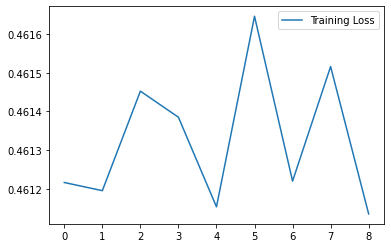

In [24]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.legend()
plt.show()

In [25]:
## YOUR CODE HERE ##
model_1.eval()

correct = 0
total = 0

# Disable gradient calculation for inference
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass: compute predicted outputs by passing inputs to the model
        images,labels=images.to(device),labels.to(device)
        outputs = model_1(images)
        
        # Get the predicted class with the highest probability
        _, predicted = torch.max(outputs.data, 1)
        
        # Update the total number of labels
        total += labels.size(0)
        
        # Update the number of correct predictions
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')


Accuracy of the model on the test images: 9.83%


## Saving your model
Using `torch.save`, save your model for future loading.

In [26]:
## YOUR CODE HERE ##
torch.save(Net, "Net.pth")
torch.save(Net_1, "Net2.pth")